# <center> Determining a sort of iris by the length and width of the petals and sepals</center>
#  <center>With help of neural networks</center>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s1.1zoom.me/big3/654/Irises_Closeup_522076_4800x3200.jpg", width=500, height=500)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("Iris.csv", index_col='Id')
print(data.shape)
data.head(10)

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [4]:
list(data)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [5]:
print(data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


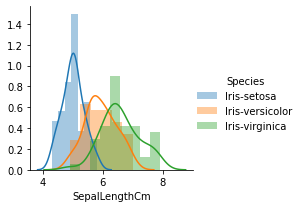

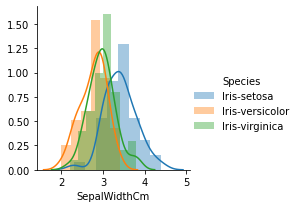

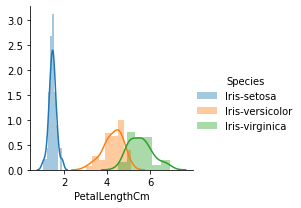

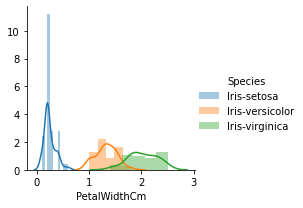

In [6]:
sns.FacetGrid(data,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()


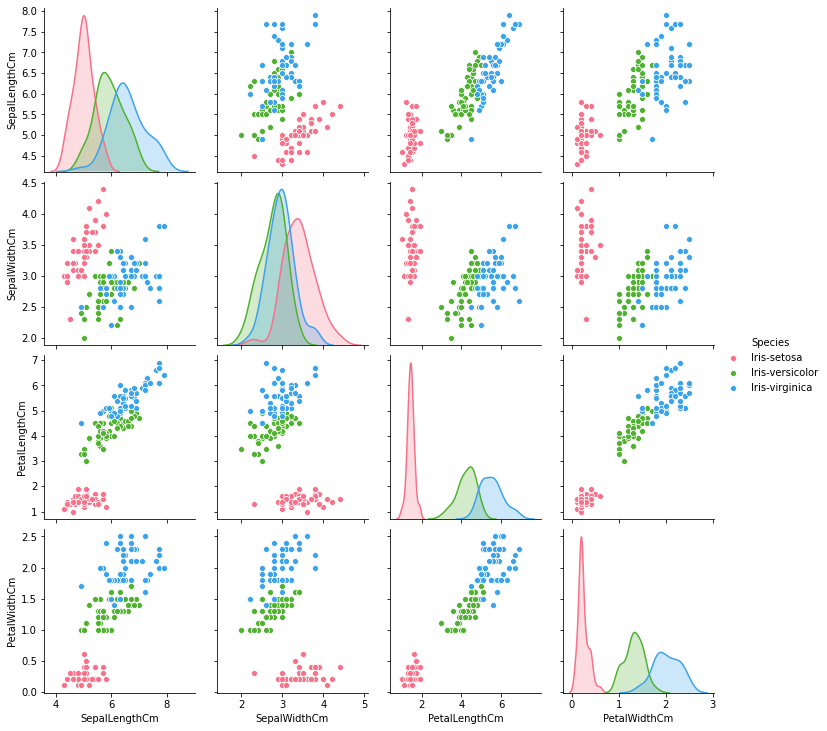

In [7]:
g = sns.pairplot(data, hue="Species", palette="husl")
plt.savefig("iris.png")

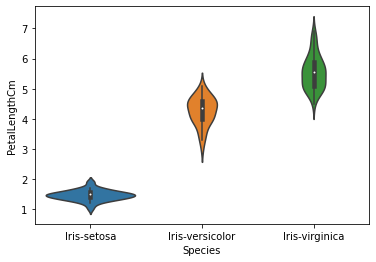

In [8]:
sns.violinplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

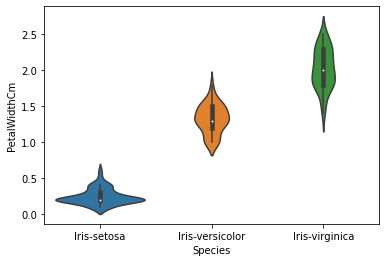

In [9]:
sns.violinplot(x="Species",y="PetalWidthCm",data=data)
plt.show()

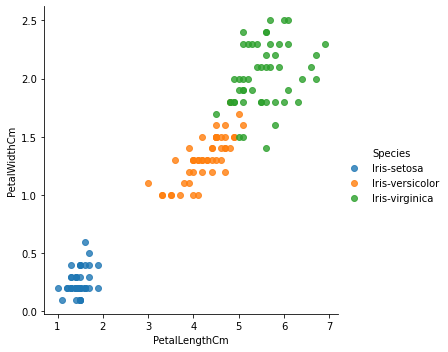

In [10]:
sns.lmplot( 'PetalLengthCm', 'PetalWidthCm',hue='Species',data=data,fit_reg=False)  

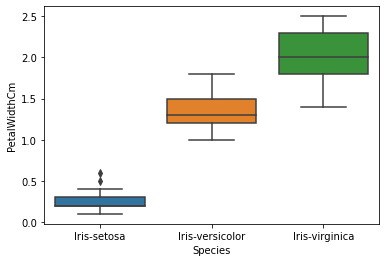

In [11]:
sns.boxplot(x="Species",y="PetalWidthCm",data=data)

Можно увидеть, что параметры 'PetalLengthCm' и 'PetalWidthCm' имеют высокую корреляцию, почти единица. Это переменные имеют сильную зависимость

In [12]:
data[list(data)].corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


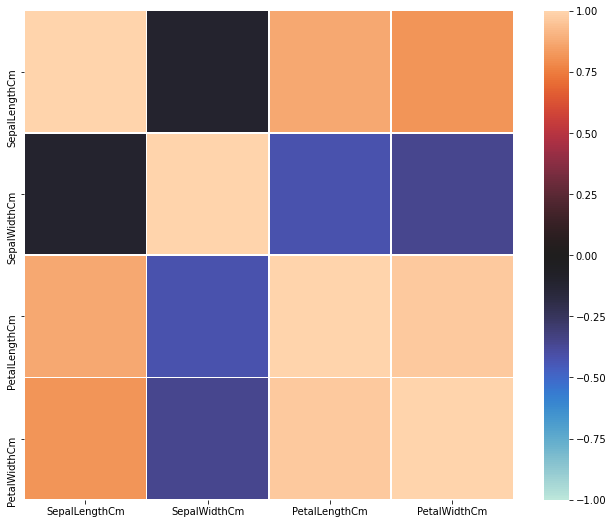

In [13]:
fig, ax = plt.subplots(figsize=(11, 9))
data_correl = data[list(data)].corr()
sns.heatmap(data_correl, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5)
plt.savefig("iris_corr.png")

Сначала попробуем использовать исходные данные никак их не преобразуя

In [14]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[features]
Y = data['Species']

In [15]:
def convert(array):
    s = set(list(array))
    converted = []
    for x in array:
        tmp = [0] * len(s)
        jt = 0
        for i in s:
            tmp[jt] = int(i == x)
            jt += 1
        converted.append(tmp)
    return converted

In [16]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y_prepared = np.array(convert(encoded_Y))

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_prepared, test_size=.25, random_state=134)

In [18]:
 
class NeuralNetwork:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
    def backward(self, X, Y, store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit_nn(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8) + (1 - Y) * np.log(1 - A.T - 1e-8))
            derivatives = self.backward(X, Y, store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        #print("Вот",A)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
    
    def fit(self, X):
        A, cache = self.forward(X)
        return A
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

Cost:  0.6378935947573006 Train Accuracy: 33.92857142857143
Cost:  0.23199315840795662 Train Accuracy: 96.42857142857143
Cost:  0.17735760852909152 Train Accuracy: 79.46428571428571
Cost:  0.1714158920087017 Train Accuracy: 82.14285714285714
Cost:  0.11711122691291291 Train Accuracy: 92.85714285714286
Train Accuracy: 98.21428571428571
Test Accuracy: 94.73684210526315


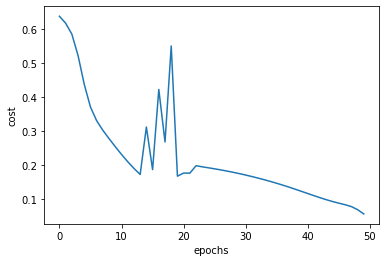

In [20]:
layers_dims = [20,10, 3]
NN = NeuralNetwork(layers_dims)
NN.fit_nn(X_train, Y_train, learning_rate=0.5, n_iterations=500)
print("Train Accuracy:", NN.predict(X_train, Y_train))
print("Test Accuracy:", NN.predict(X_test, Y_test))
NN.plot_cost()

In [21]:
res = NN.fit(X_test)
y_result = []

for i in range(res.shape[1]):
    y = []
    for j in range(res.shape[0]):
        if res[j][i] >= 0.5:
            y.append(1)
        else:
            y.append(0) 
    y_result.append(y)
y_result = np.array(y_result)

In [22]:

def convert_back(array):
    converted = []
    for x in array:
        for i in range(len(x)):
            if x[i] >= 0.5:
                converted.append(i)
                break
    return converted

[1 0 1 2 0 1 0 0 1 1 0 2 2 0 2 0 1 0 1 0 2 2 1 1 0 2 0 1 1 1 2 2 0 1 1 2 2
 0]
[1 0 1 2 0 1 0 0 2 1 0 2 2 0 2 0 1 0 1 0 2 2 1 1 0 2 0 1 1 1 2 1 0 1 1 2 2
 0]
Confusion matrix, without normalization
[[13  0  0]
 [ 0 13  1]
 [ 0  1 10]]


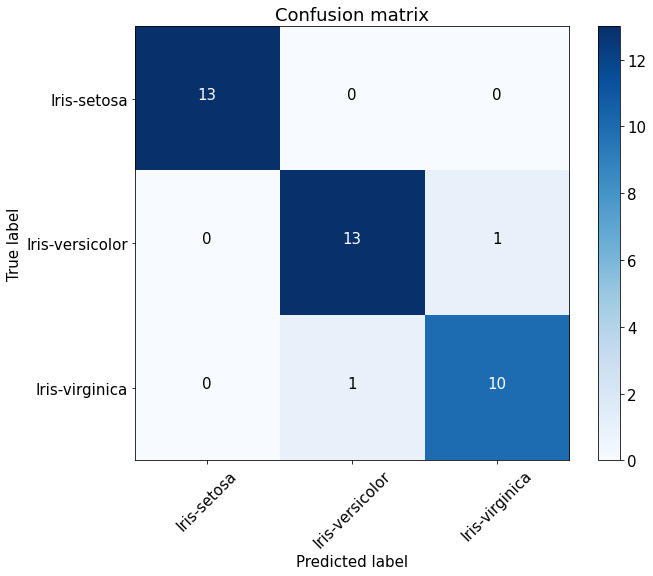

In [23]:
from sklearn.metrics import confusion_matrix
import itertools
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)
print(np.array(convert_back(Y_test)))
print(np.array(convert_back(y_result)))
cnf_matrix = confusion_matrix(np.array(convert_back(Y_test)), np.array(convert_back(y_result)))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=list(set(list(Y))),
                      title='Confusion matrix')
plt.savefig("conf_matrix_iris.png")
plt.show()

In [24]:
iris_result1 = X_test
iris_result1['Result'] = np.array(convert_back(y_result))
iris_result1['Species'] = np.array(convert_back(Y_test))

c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
iris_result1.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Result,Species
Id,,,,,,
66,6.7,3.1,4.4,1.4,1,1
47,5.1,3.8,1.6,0.2,0,0
100,5.7,2.8,4.1,1.3,1,1
102,5.8,2.7,5.1,1.9,2,2
48,4.6,3.2,1.4,0.2,0,0
87,6.7,3.1,4.7,1.5,1,1
3,4.7,3.2,1.3,0.2,0,0
46,4.8,3.0,1.4,0.3,0,0
84,6.0,2.7,5.1,1.6,2,1


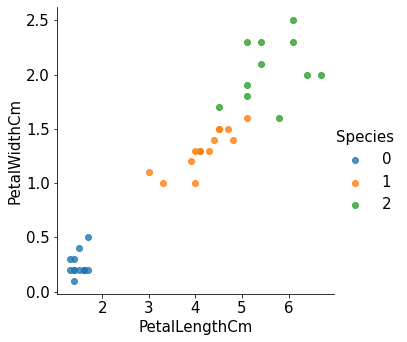

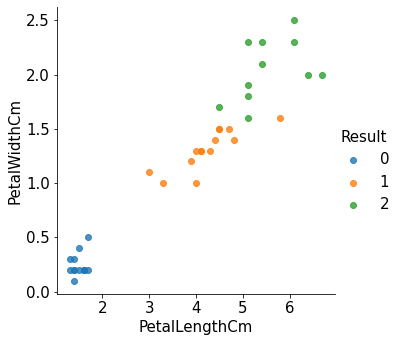

In [26]:
sns.lmplot( 'PetalLengthCm', 'PetalWidthCm',hue='Species',data=iris_result1,fit_reg=False) 
sns.lmplot( 'PetalLengthCm', 'PetalWidthCm',hue='Result',data=iris_result1,fit_reg=False) 

In [27]:
from sklearn.metrics import classification_report 
report = classification_report(Y_test, y_result, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.91      0.91      0.91        11

      micro avg       0.95      0.95      0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38
    samples avg       0.95      0.95      0.95        38



In [28]:
X_test = X_test.drop(['Result', 'Species'], axis=1) 

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
#print(model.predict(X_test))
predict = model.predict(X_test)


model2 = RandomForestRegressor()
model2.fit(X_train, Y_train)
#print(model2.predict(X_test))
predict2 = model2.predict(X_test)

model3 = GaussianNB()
model3.fit(X_train, convert_back(Y_train))
#print(model2.predict(X_test))
predict3 = model3.predict(X_test)

c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
from sklearn.metrics import classification_report 
report = classification_report(Y_test, predict, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.91      0.91      0.91        11

      micro avg       0.95      0.95      0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38
    samples avg       0.95      0.95      0.95        38



In [31]:
from sklearn.metrics import classification_report 
report = classification_report(convert_back(Y_test), convert_back(predict2), target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [32]:
from sklearn.metrics import classification_report 
report = classification_report(convert_back(Y_test), predict3, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [33]:
features2 = ['PetalLengthCm', 'PetalWidthCm']
X2 = data[features2]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y_prepared, test_size=.25, random_state=234)

Cost:  0.7131416880120146 Train Accuracy: 58.92857142857143
Cost:  0.28405582054110823 Train Accuracy: 94.64285714285714
Cost:  0.2022663993065493 Train Accuracy: 94.64285714285714
Cost:  0.15315325156093407 Train Accuracy: 95.53571428571429
Cost:  0.17352627525895026 Train Accuracy: 91.07142857142857
Train Accuracy: 88.39285714285714
Test Accuracy: 97.36842105263158


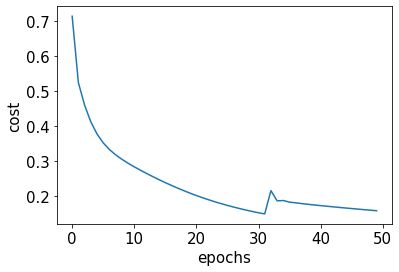

In [34]:
layers_dims = [10, 3]
NN = NeuralNetwork(layers_dims)
NN.fit_nn(X2_train, Y2_train, learning_rate=0.5, n_iterations=500)
print("Train Accuracy:", NN.predict(X2_train, Y2_train))
print("Test Accuracy:", NN.predict(X2_test, Y2_test))
NN.plot_cost()

Confusion matrix, without normalization
[[10  0  0]
 [ 0 10  1]
 [ 0  0 17]]


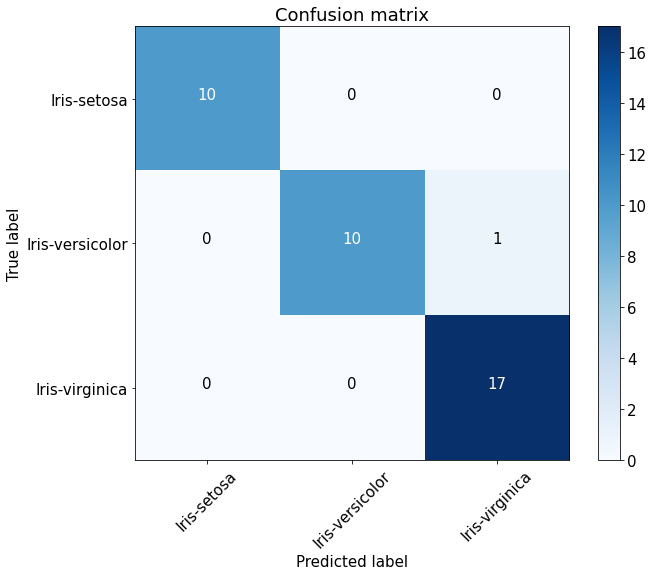

In [35]:
res2 = NN.fit(X2_test)
y2_result = []

for i in range(res2.shape[1]):
    y = []
    for j in range(res2.shape[0]):
        if res2[j][i] >= 0.5:
            y.append(1)
        else:
            y.append(0) 
    y2_result.append(y)
y2_result = np.array(y2_result)
cnf_matrix = confusion_matrix(np.array(convert_back(Y2_test)), np.array(convert_back(y2_result)))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=data.Species.unique(),
                      title='Confusion matrix')
plt.savefig("conf_matrix iris_2.png")
plt.show()

In [36]:
from sklearn.metrics import classification_report 
report = classification_report(Y2_test, y2_result, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.94      1.00      0.97        17

      micro avg       0.97      0.97      0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38
    samples avg       0.97      0.97      0.97        38



In [37]:
iris_result = X2_test
iris_result['Result'] = np.array(convert_back(y2_result))
iris_result['Species'] = np.array(convert_back(Y2_test))

c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
iris_result

,PetalLengthCm,PetalWidthCm,Result,Species
Id,,,,
140,5.4,2.1,2,2
90,4.0,1.3,1,1
82,3.7,1.0,1,1
150,5.1,1.8,2,2
95,4.2,1.3,1,1
104,5.6,1.8,2,2
138,5.5,1.8,2,2
128,4.9,1.8,2,2
119,6.9,2.3,2,2


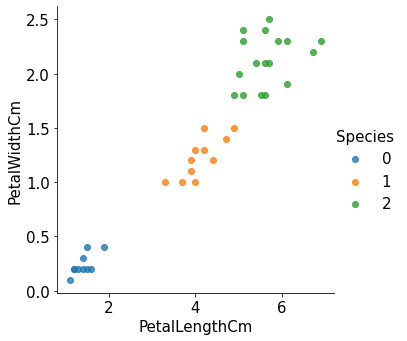

In [39]:
sns.lmplot( 'PetalLengthCm', 'PetalWidthCm',hue='Species',data=iris_result,fit_reg=False) 

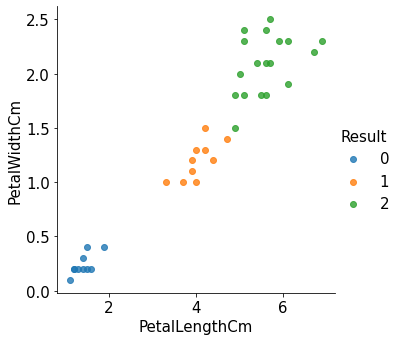

In [40]:
sns.lmplot( 'PetalLengthCm', 'PetalWidthCm',hue='Result',data=iris_result,fit_reg=False) 